# Regression Project

In this project, your goal is to build regression models of housing prices. The models should learn from data and be able to predict the median house price in a district (which is a population of 600 to 3000 people), given some predictor variables. 

Note

>This notebook shall be a cleaned up version of the previous regression notebook. It will not cover everything from the regrssion notebook (only best model). And I try to avoid some mistakes I made in the original notebook. Moreover Ill try to do the data split before I start with the work on the data



## Plan
### Identify Use Case
We want to build a regression model for the median house price for certain districts. Goal is to predict the median_house_price based on the available data and variables for districts.
We want to train the data, evaluate models and test them with the test data. Therefore we need to split the data before we start with the modelling. We are owning a  company which is investing in houses and flats. Based on the development of our changes in the variables we want to predict how the prices will behave afterwards. This regression will be a basis on our inverstment and sell strategy of our houses and flats.

### Frame problem
There are some variables in the table which are not necessary and can be dropped. Moreover we need to adjust the data in the table so that it can be worked with them. E.g. Data needs to be preprocessed, cleaned and variables need to be adjusted (total_rooms & total_bedrooms need to be adapted so that it is in average for each house). For the city districts we want to predict the house prices so that we can adapt our strategy so that we can maximize our profit.

### Identify variables
Our response variable is the median_house-value, which shall be predicted after we built the model and trained and tested it. If the price_category is set correclty then this is the response variable, to see if the price is above or below the median house price. Basically both variables are important as response variables for our model
longitude and latitude can be dropped, that wont effect the data. Because both only make sense combined. Althought the location of a house affects the price, in this case both are only useful combined and each row display a whole district. So the longitude and latitude data it self wont affect the housing price in a logical order
- housing_median__age is a useful variable and shall be used as a predictor
- total_rooms and total_bedrooms need to be reduced to the average per household otherwise it does not make sense
- population and household makes sense to use for the data model. Even thought both affect each other. If there are more people, there will be also more households. The data analysis will show how to use them
- median_income is a useful variable and shall be used as a predictor
- ocean_proximity is a useful variable and shall be used as a predictor

### Define metrics
The goal of our company is predict the price development based on certrain varaibles to decide wheather to buy or sell house/flats. Project is successfull if the prediction is on average only 30.000 away from the actual price.


## Python setup

In [1]:
# Python setup as described in Regression basics and Regression diagnostics 

import numpy as np 
import pandas as pd 
from patsy import dmatrices

from scipy import stats 
import statsmodels.formula.api as smf

from statsmodels.compat import lzip
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrices
import matplotlib.pyplot as plt 
import seaborn as sns 

# seaborn settings
costum_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=costum_params)

%matplotlib inline 
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [2]:
# Check version of skitlearn
import sklearn

print('scikit-learn version:', sklearn.__version__)

scikit-learn version: 1.0.2


Version is 1.0.2 --> latest version

## Import Data/Data Ingestion

In [3]:
# import data 
# in this case I have used a formula from stackoverflow, because I was not able to make it work with ROOT + DATA or the other formulas from the notebooks
# Link to stackoverflow: https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas 

url = "https://raw.githubusercontent.com/jan-kirenz/project-DanielSteck/main/project_data.csv?token=GHSAT0AAAAAABP5WYYS3N7LIECOFSXXBYGMYPLZQ3A"
df = pd.read_csv(url)

In [4]:
# check if data import was succesful
df

longitude  latitude housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88          41.0years          880           129.0   
1        -122.22     37.86               21.0         7099          1106.0   
2        -122.24     37.85               52.0         1467           190.0   
3        -122.25     37.85               52.0         1274           235.0   
4        -122.25     37.85               52.0         1627           280.0   
...          ...       ...                ...          ...             ...   
20635    -121.09     39.48               25.0         1665           374.0   
20636    -121.21     39.49               18.0          697           150.0   
20637    -121.22     39.43               17.0         2254           485.0   
20638    -121.32     39.43               18.0         1860           409.0   
20639    -121.24     39.37               16.0         2785           616.0   

       population  households  median_income median_house_value  \
0             322         126         8.3252          452600.0$   
1            2401        1138         8.3014           358500.0   
2             496         177         7.2574           352100.0   
3             558         219         5.6431           341300.0   
4             565         259         3.8462           342200.0   
...           ...         ...            ...                ...   
20635         845         330         1.5603            78100.0   
20636         356         114         2.5568            77100.0   
20637        1007         433         1.7000            92300.0   
20638         741         349         1.8672            84700.0   
20639        1387         530         2.3886            89400.0   

      ocean_proximity price_category  
0            NEAR BAY          above  
1            NEAR BAY          above  
2            NEAR BAY          above  
3            NEAR BAY          above  
4            NEAR BAY          above  
...               ...            ...  
20635          INLAND          above  
20636          INLAND          above  
20637          INLAND          above  
20638          INLAND          above  
20639          INLAND          above  

[20640 rows x 11 columns]

In [5]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  object 
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  object 
 9   ocean_proximity     20640 non-null  object 
 10  price_category      20640 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.7+ MB


In [6]:
# show all variables in the data set
df. columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'price_category'],
      dtype='object')

**Explanation for the columns** :

- housing_median_age: Median age of a house within a district; a lower number is a newer building
- total_rooms: Total number of rooms within a district
- total_bedrooms: Total number of bedrooms within a district
- population: Total number of people residing within a district
- households: Total number of households, a group of people residing within a home unit, for a district
- median_income: Median income for households within a district of houses (measured in tens of thousands of US Dollars)
- median_house_value: Median house value within a district (measured in US Dollars)
- ocean_proximity: Location of the district
- price_category: Indicator variable made from median_house_value (if median house value is below or above 150000)

### Clean Data
First line (line 0) has to wrong values (housing median age: 41years and median_house_value). Since there is only this row affected and the data seems correct, it will be manually adapted.

Afterwards the data type can be changed to float64 (int64 would also be possible, but it might be possible, that there might decimal places)

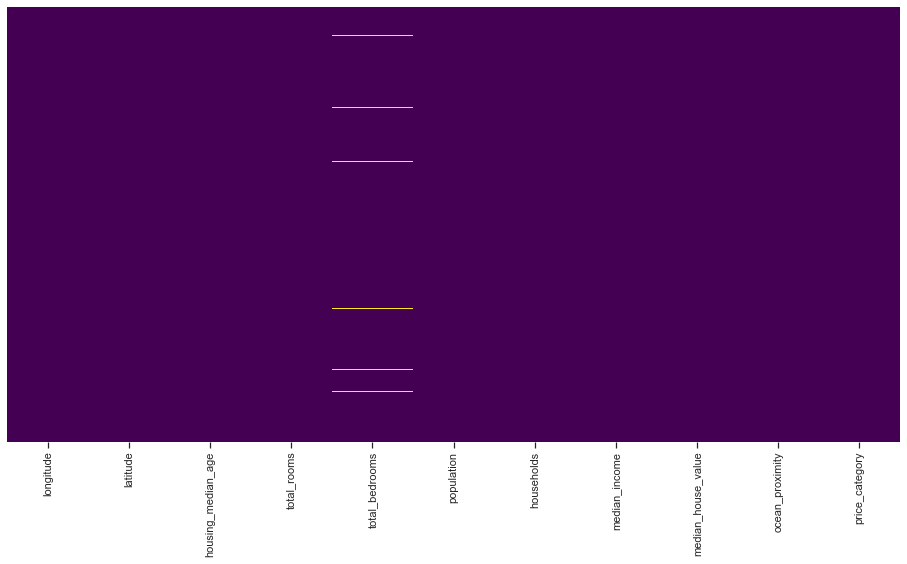

In [7]:
# show missing values (missing values - if present - will be displayed in yellow)
sns.heatmap(df.isnull(), 
            yticklabels=False,
            cbar=False, 
            cmap='viridis');

In [8]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
price_category          0
dtype: int64


There are 207 lines where we do not have a value for the amount of total bedrooms!

What was learned from the data Inscpetion:

- First line (line 0) has to wrong values (housing median age: 41years and median_house_value). I will manually adjust these data, so that it will be correct, instead of dropping the whole line. Afterwards the data type can be changed to float64 (int64 would also be possible, but it might be possible, that there might decimal places)
- There are 207 lines where we do not have a value for the amount of total bedrooms! --> Normally the preprocessor pipeline would take care of that, but that is only working with scikit. I am removing these rows now, because in my opinion it makes more sense to drop these instead of adding the mean to those empty lines. 

In [9]:
# replace the data in line 0
df['housing_median_age'] = df['housing_median_age'].replace(['41.0years'], '41.0')
df['median_house_value'] = df['median_house_value'].replace(['452600.0$'], '452600.0')

# change data type
df['housing_median_age'] = pd.Float64Index(df['housing_median_age'])
df['median_house_value'] = pd.Float64Index(df['median_house_value'])
df['ocean_proximity'] =pd.Categorical(df['ocean_proximity'])
df['price_category'] =pd.Categorical(df['price_category'])

# check the data
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                52.0         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252            452600.0   
1            2401        1138         8.3014            358500.0   
2             496         177         7.2574            352100.0   
3             558         219         5.6431            341300.0   
4             565         259         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635         845         330         1.5603             78100.0   
20636         356         114         2.5568             77100.0   
20637        1007         433         1.7000             92300.0   
20638         741         349         1.8672             84700.0   
20639        1387         530         2.3886             89400.0   

      ocean_proximity price_category  
0            NEAR BAY          above  
1            NEAR BAY          above  
2            NEAR BAY          above  
3            NEAR BAY          above  
4            NEAR BAY          above  
...               ...            ...  
20635          INLAND          above  
20636          INLAND          above  
20637          INLAND          above  
20638          INLAND          above  
20639          INLAND          above  

[20640 rows x 11 columns]

In [10]:
# check if the data types were changed succesfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
 10  price_category      20640 non-null  category
dtypes: category(2), float64(6), int64(3)
memory usage: 1.5 MB


In [11]:
# change column name, so that the naming is similar to the other colum names

df.rename(columns = {
    "housing_median_age": "median_housing_age"},
inplace=True)

df

longitude  latitude  median_housing_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                52.0         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252            452600.0   
1            2401        1138         8.3014            358500.0   
2             496         177         7.2574            352100.0   
3             558         219         5.6431            341300.0   
4             565         259         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635         845         330         1.5603             78100.0   
20636         356         114         2.5568             77100.0   
20637        1007         433         1.7000             92300.0   
20638         741         349         1.8672             84700.0   
20639        1387         530         2.3886             89400.0   

      ocean_proximity price_category  
0            NEAR BAY          above  
1            NEAR BAY          above  
2            NEAR BAY          above  
3            NEAR BAY          above  
4            NEAR BAY          above  
...               ...            ...  
20635          INLAND          above  
20636          INLAND          above  
20637          INLAND          above  
20638          INLAND          above  
20639          INLAND          above  

[20640 rows x 11 columns]

Dropping irrelevant features: longitude, latitude wont affect the median_house_value.
Moreover the price_category may not be used, because it is based on the median_house_value. Therefore it will be dropped as well

In [12]:
# Drop irrelevant features
df = df.drop(['longitude', 'latitude', 'price_category'], axis=1)

Adding new colums to the table.

Background: Total_rooms & total_bedrooms is not comparable if in one district are 100 households and in one 500 households --> calculation per household Also for the avg. size per household to see how big the household and therefore the flat is (even though it is already included in the avg_rooms_per_household)

Moreover the unit from median_income has to be identical to the unit from median_house_value. Thats why both will be in $.

Afterwards the total_rooms and total_bedrooms can be dropped, because it is already included via the avg_per_household

In [13]:
# calculate average rooms per household: total_rooms/households
df['avg_rooms_per_household'] = round(df['total_rooms']/df['households'],2)
# calculate average bedrooms per households: total_bedromms/ househols
df['avg_bedrooms_per_household'] = round(df['total_bedrooms']/df['households'],2)
# calculate average household size: population/households
df['avg_size_per_household'] = round(df['population']/df['households'],2)

# get the median income in $ and not in 10.000$
df['median_income']= df['median_income']*10000

df = df.drop(['total_rooms', 'total_bedrooms'], axis=1)

df

median_housing_age  population  households  median_income  \
0                    41.0         322         126        83252.0   
1                    21.0        2401        1138        83014.0   
2                    52.0         496         177        72574.0   
3                    52.0         558         219        56431.0   
4                    52.0         565         259        38462.0   
...                   ...         ...         ...            ...   
20635                25.0         845         330        15603.0   
20636                18.0         356         114        25568.0   
20637                17.0        1007         433        17000.0   
20638                18.0         741         349        18672.0   
20639                16.0        1387         530        23886.0   

       median_house_value ocean_proximity  avg_rooms_per_household  \
0                452600.0        NEAR BAY                     6.98   
1                358500.0        NEAR BAY                     6.24   
2                352100.0        NEAR BAY                     8.29   
3                341300.0        NEAR BAY                     5.82   
4                342200.0        NEAR BAY                     6.28   
...                   ...             ...                      ...   
20635             78100.0          INLAND                     5.05   
20636             77100.0          INLAND                     6.11   
20637             92300.0          INLAND                     5.21   
20638             84700.0          INLAND                     5.33   
20639             89400.0          INLAND                     5.25   

       avg_bedrooms_per_household  avg_size_per_household  
0                            1.02                    2.56  
1                            0.97                    2.11  
2                            1.07                    2.80  
3                            1.07                    2.55  
4                            1.08                    2.18  
...                           ...                     ...  
20635                        1.13                    2.56  
20636                        1.32                    3.12  
20637                        1.12                    2.33  
20638                        1.17                    2.12  
20639                        1.16                    2.62  

[20640 rows x 9 columns]

In [14]:
# drop remaining rows with one missing value
df = df.dropna()

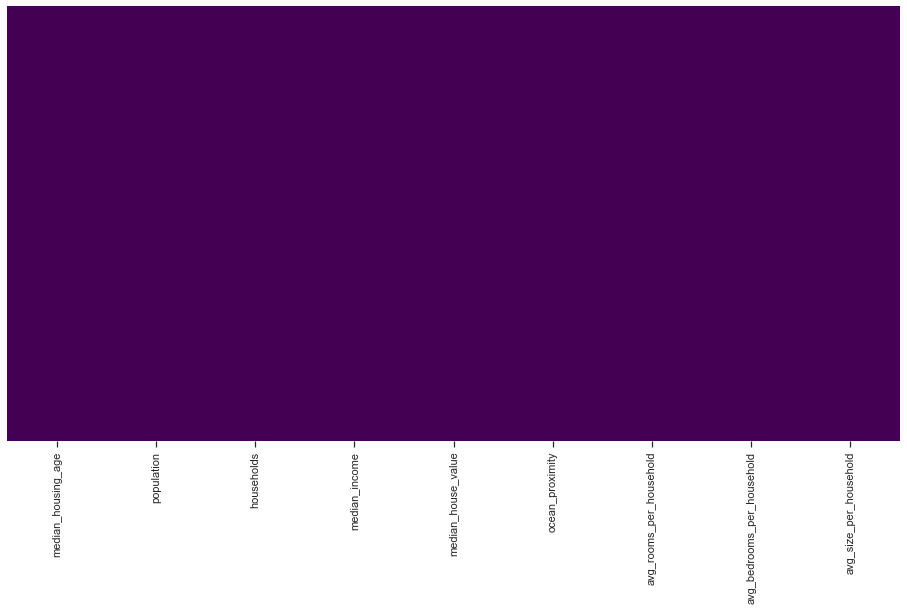

In [15]:
# show missing values --> Check if the lines were dropped successfully
sns.heatmap(df.isnull(), 
            yticklabels=False,
            cbar=False, 
            cmap='viridis');

In [16]:
# check column-wise distribution of null values
print(df.isnull().sum())

median_housing_age            0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
avg_rooms_per_household       0
avg_bedrooms_per_household    0
avg_size_per_household        0
dtype: int64


Rows with missing values were dropped successfully

## Data preprocessing pipeline

In [17]:
# Modules
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
# for numeric features
# simpleImputr --> übrall wo daten fehlen --> median
# Standardscaler --> verwendung eines standardskalers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

df

median_housing_age  population  households  median_income  \
0                    41.0         322         126        83252.0   
1                    21.0        2401        1138        83014.0   
2                    52.0         496         177        72574.0   
3                    52.0         558         219        56431.0   
4                    52.0         565         259        38462.0   
...                   ...         ...         ...            ...   
20635                25.0         845         330        15603.0   
20636                18.0         356         114        25568.0   
20637                17.0        1007         433        17000.0   
20638                18.0         741         349        18672.0   
20639                16.0        1387         530        23886.0   

       median_house_value ocean_proximity  avg_rooms_per_household  \
0                452600.0        NEAR BAY                     6.98   
1                358500.0        NEAR BAY                     6.24   
2                352100.0        NEAR BAY                     8.29   
3                341300.0        NEAR BAY                     5.82   
4                342200.0        NEAR BAY                     6.28   
...                   ...             ...                      ...   
20635             78100.0          INLAND                     5.05   
20636             77100.0          INLAND                     6.11   
20637             92300.0          INLAND                     5.21   
20638             84700.0          INLAND                     5.33   
20639             89400.0          INLAND                     5.25   

       avg_bedrooms_per_household  avg_size_per_household  
0                            1.02                    2.56  
1                            0.97                    2.11  
2                            1.07                    2.80  
3                            1.07                    2.55  
4                            1.08                    2.18  
...                           ...                     ...  
20635                        1.13                    2.56  
20636                        1.32                    3.12  
20637                        1.12                    2.33  
20638                        1.17                    2.12  
20639                        1.16                    2.62  

[20433 rows x 9 columns]

In [19]:
# for categorical features  
# SimpleImputer --> fehlende zeilen werden mit konstante gefüllt
# onehotEncoder --> transponierung der tabelle, so dass zu kategorie die möglichen attribute pro spalte stehen. Diese werden dann per 0, 0 und 1 für unzutreffend und zutreffend gekennzeichnet
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

df

median_housing_age  population  households  median_income  \
0                    41.0         322         126        83252.0   
1                    21.0        2401        1138        83014.0   
2                    52.0         496         177        72574.0   
3                    52.0         558         219        56431.0   
4                    52.0         565         259        38462.0   
...                   ...         ...         ...            ...   
20635                25.0         845         330        15603.0   
20636                18.0         356         114        25568.0   
20637                17.0        1007         433        17000.0   
20638                18.0         741         349        18672.0   
20639                16.0        1387         530        23886.0   

       median_house_value ocean_proximity  avg_rooms_per_household  \
0                452600.0        NEAR BAY                     6.98   
1                358500.0        NEAR BAY                     6.24   
2                352100.0        NEAR BAY                     8.29   
3                341300.0        NEAR BAY                     5.82   
4                342200.0        NEAR BAY                     6.28   
...                   ...             ...                      ...   
20635             78100.0          INLAND                     5.05   
20636             77100.0          INLAND                     6.11   
20637             92300.0          INLAND                     5.21   
20638             84700.0          INLAND                     5.33   
20639             89400.0          INLAND                     5.25   

       avg_bedrooms_per_household  avg_size_per_household  
0                            1.02                    2.56  
1                            0.97                    2.11  
2                            1.07                    2.80  
3                            1.07                    2.55  
4                            1.08                    2.18  
...                           ...                     ...  
20635                        1.13                    2.56  
20636                        1.32                    3.12  
20637                        1.12                    2.33  
20638                        1.17                    2.12  
20639                        1.16                    2.62  

[20433 rows x 9 columns]

In [20]:
# Pipeline wird gebaut, nummerische für alle außer kategorie und für categotische für all kategorischen
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
        ])

Preprocessor pipeline was built sucessfully and we can add it later when the modelling process starts

## Data splitting

In [21]:
# prepare data for scikit learn
# Goal is to predict the median_house_value, therefore this shall be our response (y) variable. Alle other variables shall be included as x. Later the analysis will show which variables shall be included in the model

X = df.drop(columns = ['median_house_value'])
y = df['median_house_value']

In [22]:
# Split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [23]:
# Make data exploration set

train_dataset = pd.DataFrame(X_train).copy()
train_dataset['median_house_value'] = pd.DataFrame(y_train)

train_dataset

median_housing_age  population  households  median_income  \
4353                 39.0         975         525        93092.0   
6847                 42.0         656         215        41902.0   
18321                37.0         510         206        79029.0   
10987                23.0        1574         642        50210.0   
3115                 14.0         850         317        25812.0   
...                   ...         ...         ...            ...   
9464                 47.0         552         201        25192.0   
7373                 44.0        3913         842        30143.0   
17897                36.0        1589         387        31065.0   
7375                 47.0        1097         274        28810.0   
17842                31.0        1898         475        56651.0   

      ocean_proximity  avg_rooms_per_household  avg_bedrooms_per_household  \
4353        <1H OCEAN                     7.23                        1.12   
6847        <1H OCEAN                     4.82                        0.93   
18321        NEAR BAY                     6.25                        0.96   
10987       <1H OCEAN                     5.45                        0.99   
3115           INLAND                     5.49                        1.23   
...               ...                      ...                         ...   
9464        <1H OCEAN                     5.72                        1.21   
7373        <1H OCEAN                     3.78                        1.04   
17897       <1H OCEAN                     4.71                        1.06   
7375        <1H OCEAN                     3.86                        1.08   
17842       <1H OCEAN                     5.42                        1.00   

       avg_size_per_household  median_house_value  
4353                     1.86            500001.0  
6847                     3.05            235000.0  
18321                    2.48            500001.0  
10987                    2.45            252200.0  
3115                     2.68             91700.0  
...                       ...                 ...  
9464                     2.75            110400.0  
7373                     4.65            148200.0  
17897                    4.11            234100.0  
7375                     4.00            183300.0  
17842                    4.00            204100.0  

[16346 rows x 9 columns]

## Analyze data

Note:
> In this notebook I will not remove the data outliners to ensure that I do not change anything in the results, therefore the boxplots will be including the outliners/points with high leverage
### Exploration data analysis

In [24]:
train_dataset.describe()

median_housing_age    population    households  median_income  \
count        16346.000000  16346.000000  16346.000000   16346.000000   
mean            28.622048   1424.479261    500.259513   38646.095191   
std             12.583667   1143.005711    385.256375   18998.918979   
min              1.000000      3.000000      1.000000    4999.000000   
25%             18.000000    784.250000    279.000000   25625.000000   
50%             29.000000   1166.000000    410.000000   35255.000000   
75%             37.000000   1722.000000    606.000000   47344.000000   
max             52.000000  35682.000000   6082.000000  150001.000000   

       avg_rooms_per_household  avg_bedrooms_per_household  \
count             16346.000000                16346.000000   
mean                  5.425772                    1.096104   
std                   2.374506                    0.426343   
min                   0.890000                    0.380000   
25%                   4.440000                    1.010000   
50%                   5.230000                    1.050000   
75%                   6.050000                    1.100000   
max                 141.910000                   25.640000   

       avg_size_per_household  median_house_value  
count            16346.000000        16346.000000  
mean                 2.997307       206549.838982  
std                  5.160121       115617.420805  
min                  0.750000        14999.000000  
25%                  2.430000       119000.000000  
50%                  2.820000       179400.000000  
75%                  3.280000       264075.000000  
max                599.710000       500001.000000

What can be seen in this data:

the mean values of each variable are:

- **28.622048** for median_housing_age 
- **1424.479261** for population 
- **500.259513** for households 
- **38646.095191** for median_income 
- **5.425772** avg_rooms_per_household 
- **1.096104** avg_bedrooms_per_household 
- **2.997307** avg_size_per_household 
- **206549.838982** for median_house_value 

Further findings:
- Avg bedrooms per household has almost no variation (most values between 1.01 and 1.1), probably this wont affect the median_house_value, but this shall be analyzed with plots
- I assume there are some errors in the dataset, for example the max value of avg_size_per_household. --> I do not believe that in a district are living on average 600 persons in one household.... But in this notebook these errors/outliners will not be removed with cooks distance, so they will be kept in the dataset
- The standard deviations are quite high... So I have the situation in which data points are widely spread from the mean.



### Distribution

Visualization of differences

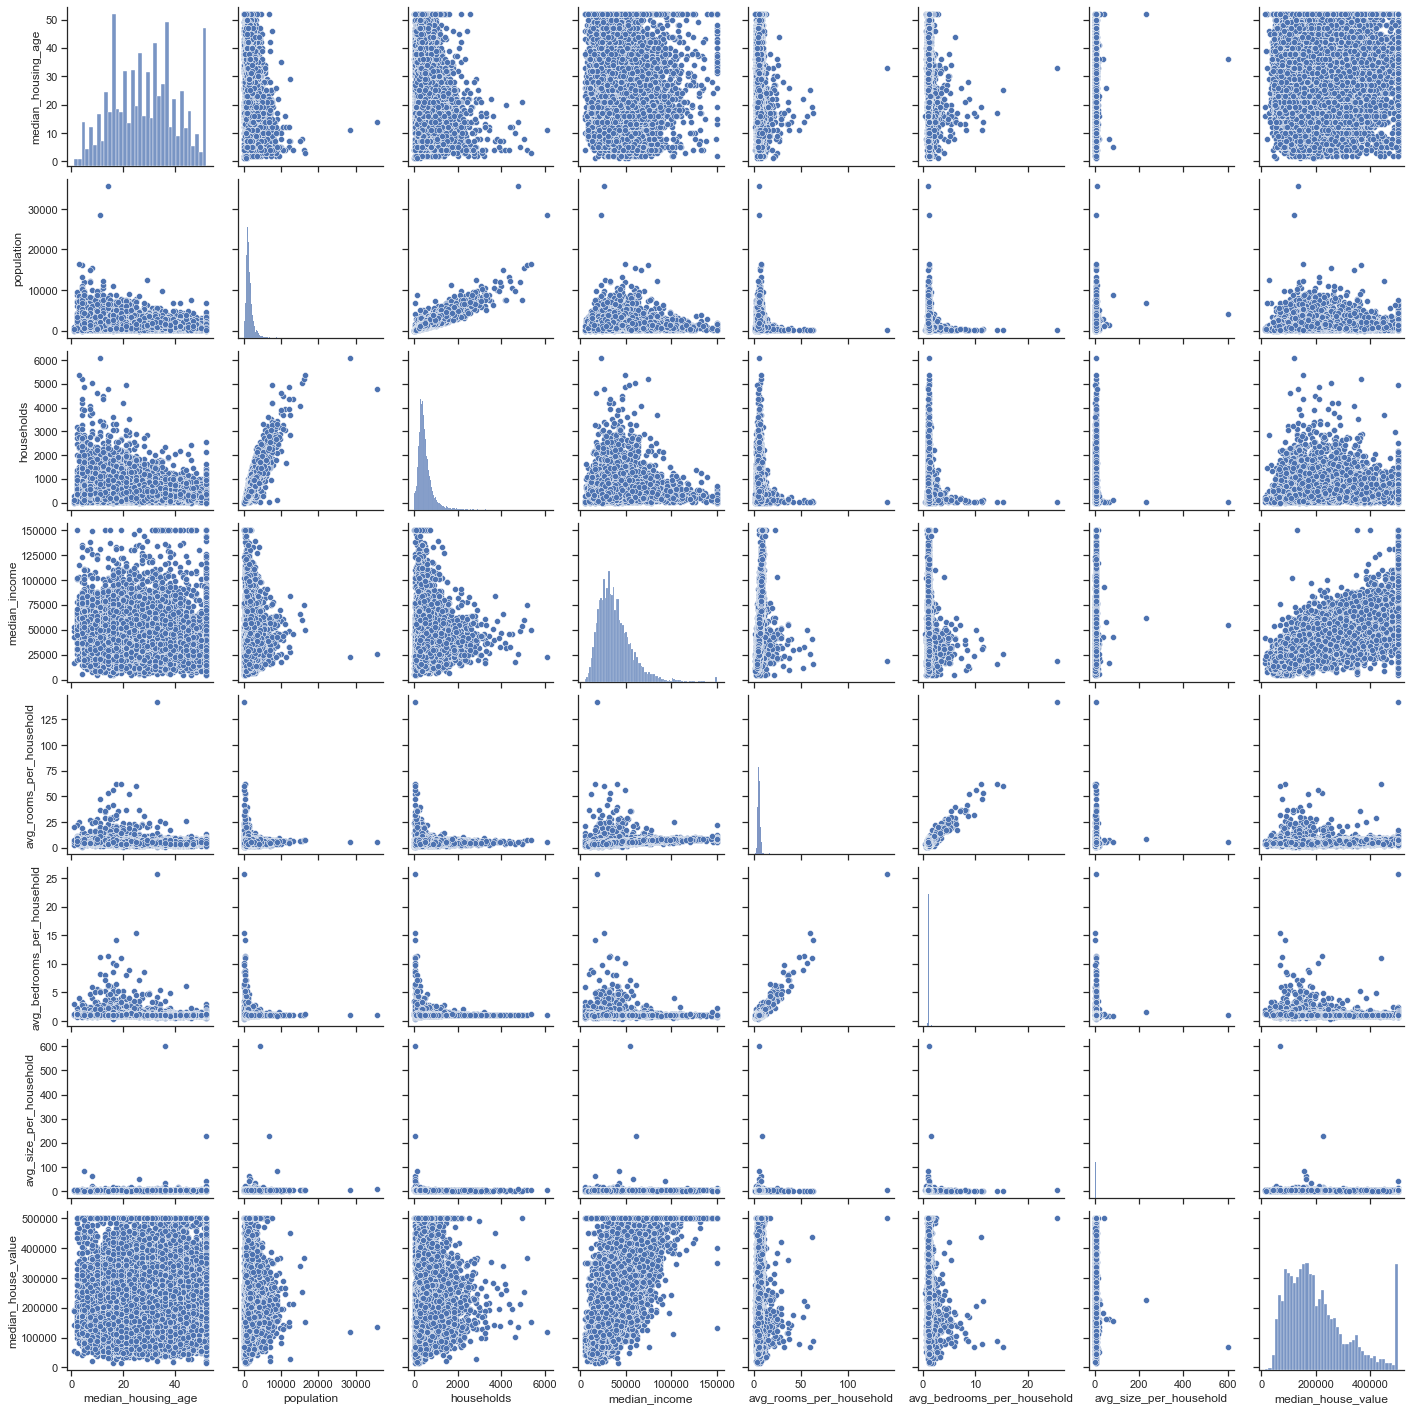

In [25]:
sns.pairplot (data=train_dataset)

It is hard to find the impact of each variable due to the huge amount of data. 

What can be seen: 

- Positive association between **median_house_value** and **median_income** which is linear
- There might be positive associations between **median_house_value** and **avg_rooms_per_household** as well as **median_house_value** and **population** as all as **median_house_value** and **households** --> It is hard so state this clearly

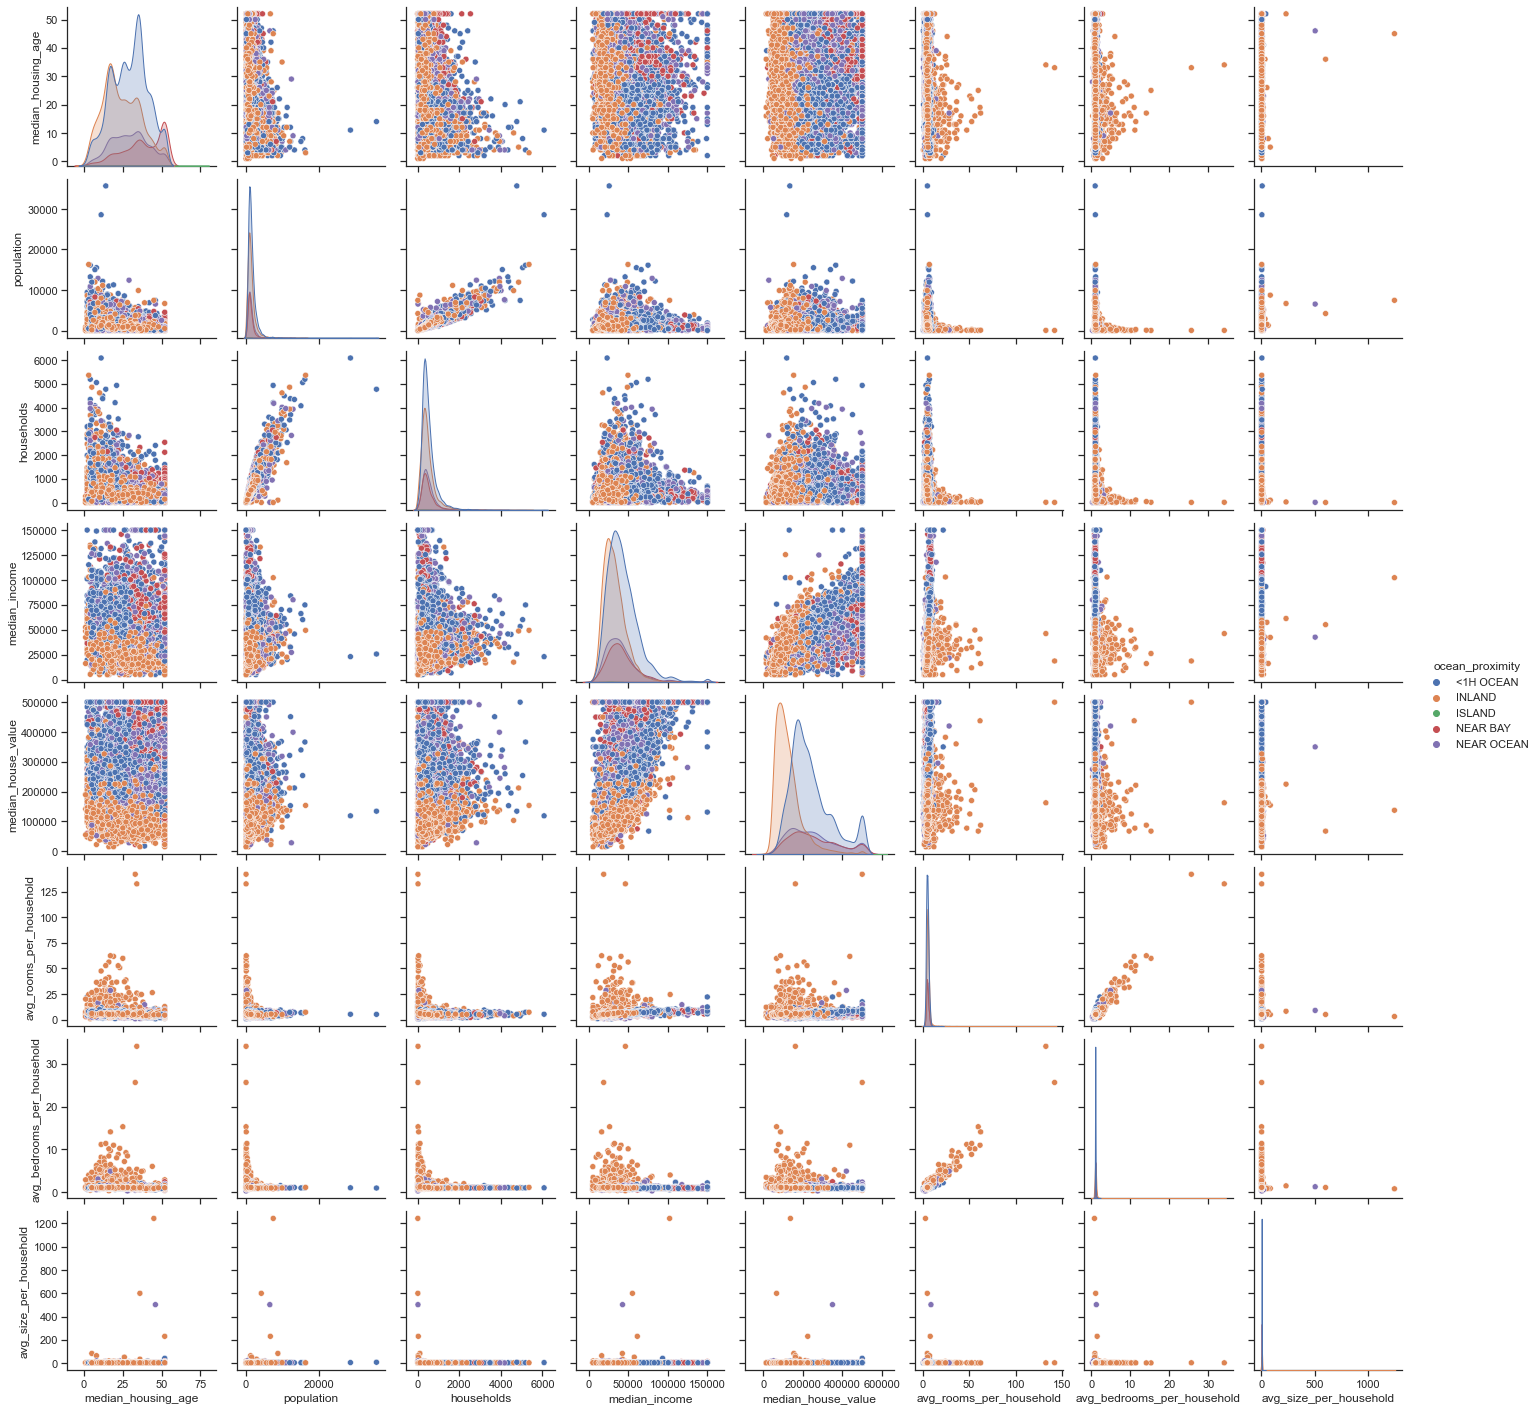

In [26]:
# now lets include the categorical variable ocean_proximity to the pairplot
sns.pairplot(df, hue="ocean_proximity");

Impact of ocean proximity to median house value:
- Inland leads to a lower house value, all orange dots are more on the left side of the graphs with median_house_value. 
- <1H Ocean has some influence on the median_house_value. Blue dots are in the middle and on the right side of the graphs with median house value.
- Inland and <1H ocean are occuring way more often than the Island, Near Bay and Near Ocean
- For Island I can not see a difference between the median house value, because I can not really identify green dots
- Near Bay and Near Ocean may lead to a higher median house value (see later in detail)

Now lets have a look on the influence of each variable to the median_house_value

<AxesSubplot:xlabel='median_housing_age', ylabel='median_house_value'>

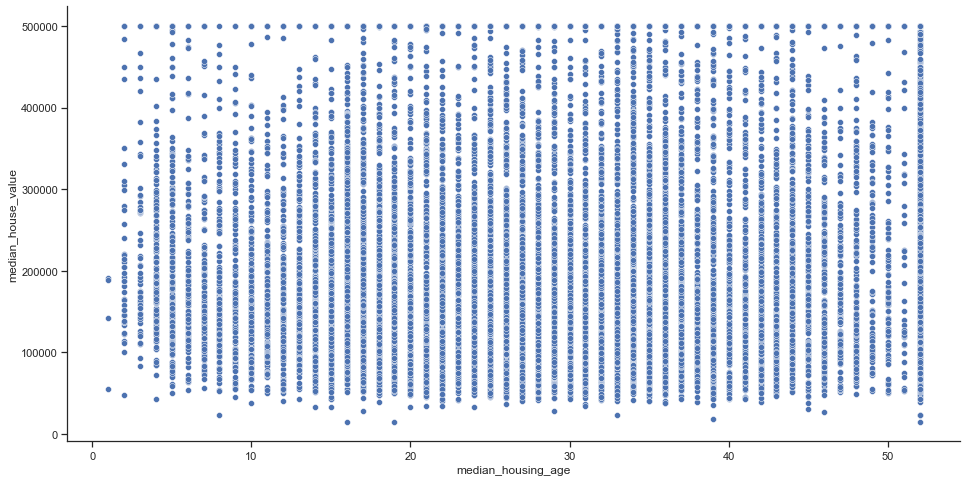

In [27]:
sns.scatterplot(data=train_dataset, x='median_housing_age', y='median_house_value')

This variable has no influence on the median_house_value. Atleast I cannot see that it affects it. So this variable wont be added to the model.

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

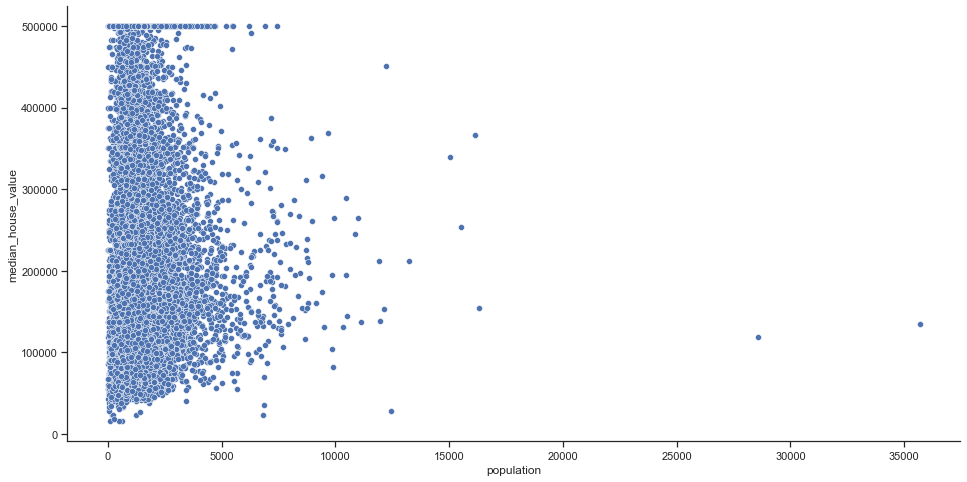

In [28]:
sns.scatterplot(data=train_dataset, x='population', y='median_house_value')

Looks like this variable has an effect on the median_house_value, but it is hard to state this clear due to the huge amount of data

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

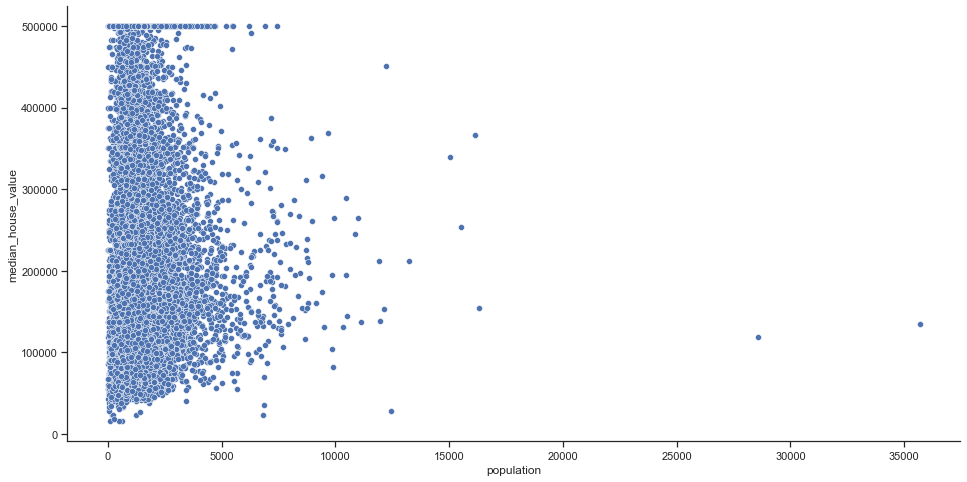

In [29]:
sns.scatterplot(data=train_dataset, x='population', y='median_house_value')

Looks like this variable has an effect on the median_house_value, but it is hard to state this clear due to the huge amount of data

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

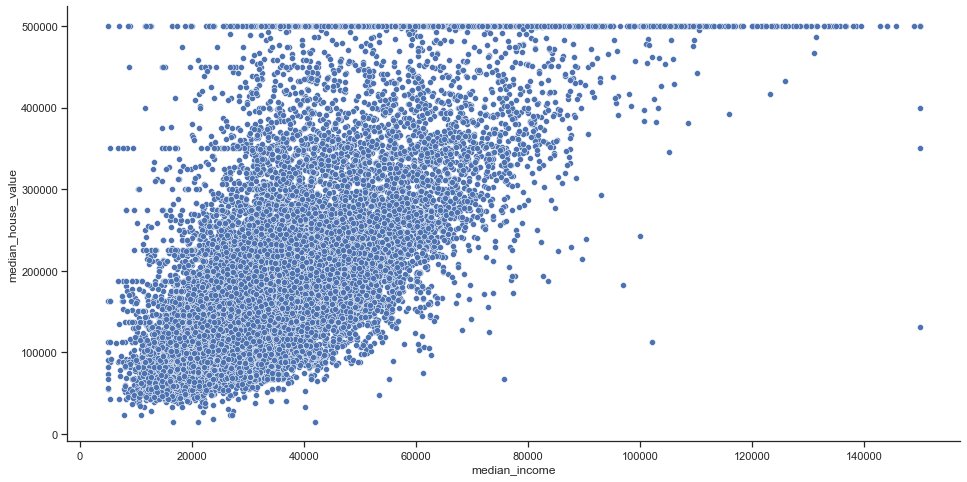

In [30]:
sns.scatterplot(data=train_dataset, x='median_income', y='median_house_value')

For this variable it can be seen that this variable has a strong influence on the median_house_value. A strong and positive association can be seen here. This variable will be added for sure to the model.


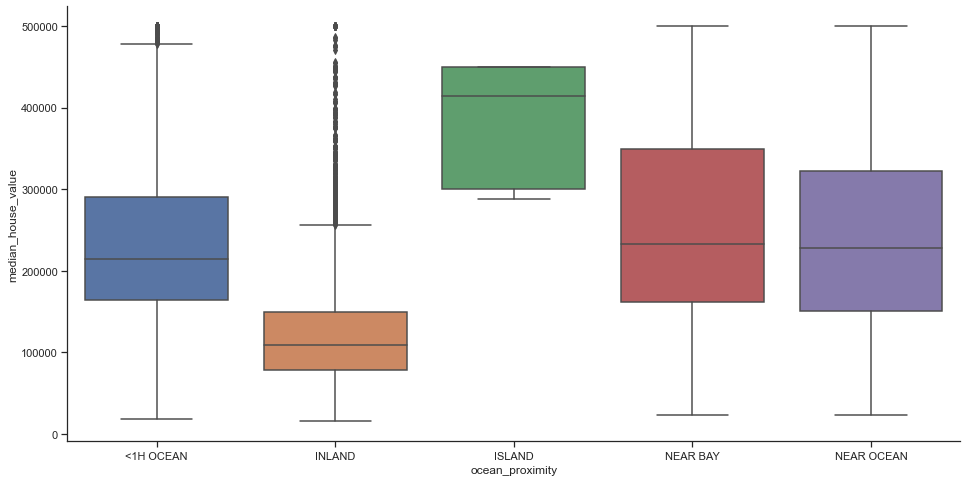

In [31]:
#boxplot
sns.boxplot(data=train_dataset, y="median_house_value", x="ocean_proximity");

It can be seen, that this variables has also an influence on the median_house_value, therefore this variable should be added to the model as well

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

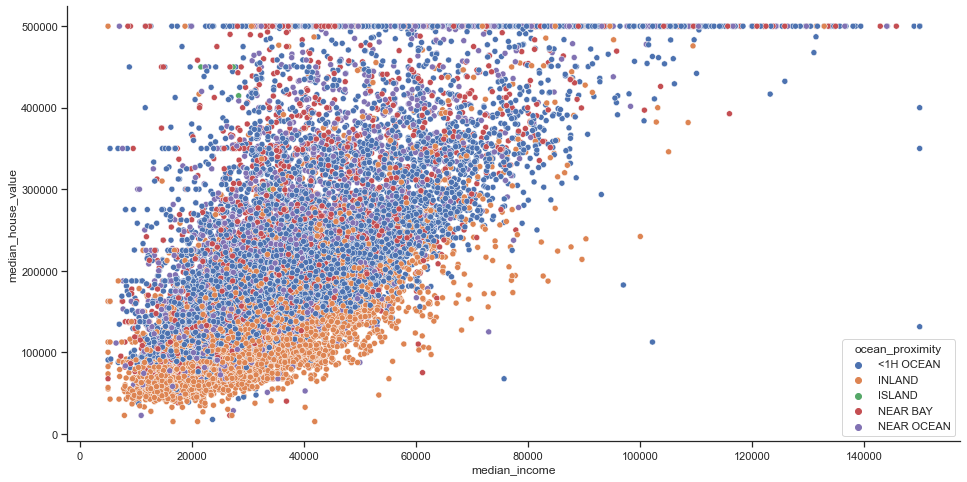

In [32]:
sns.scatterplot(data=train_dataset, x='median_income', y='median_house_value', hue="ocean_proximity")

For sure the Inland affects the mednian_house_value (lower house value). 
For <1h ocean it is hard to say, because it is speaded a lot, but blue is mainly on a median_house_value above 100.000.
Actually I can not really see the dots for Island, but in the boxplot I saw, that is leads to a higher median_house_value
For near ocean and near bay I can not really see a difference

<AxesSubplot:xlabel='avg_rooms_per_household', ylabel='median_house_value'>

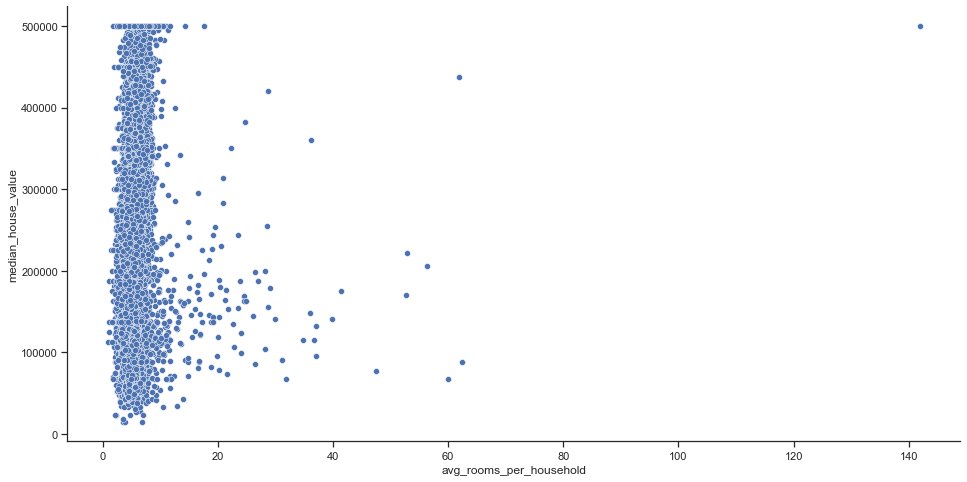

In [33]:
sns.scatterplot(data=train_dataset, x='avg_rooms_per_household', y='median_house_value')

It is hard to see the influence of this variable due to the huge amount of data. I would say that there is no big influence.

<AxesSubplot:xlabel='avg_bedrooms_per_household', ylabel='median_house_value'>

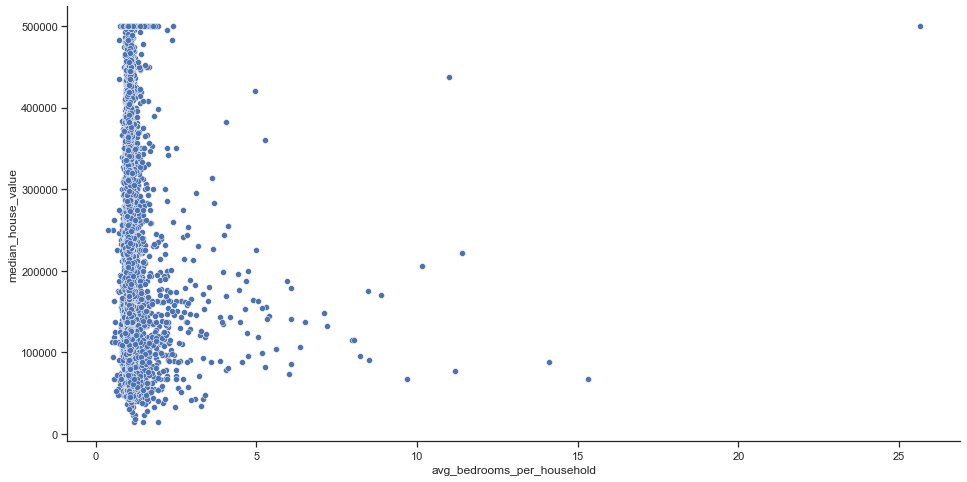

In [34]:
sns.scatterplot(data=train_dataset, x='avg_bedrooms_per_household', y='median_house_value')

It is hard to see the influence of this variable due to the huge amount of data. I would say that there is no big influence.

<AxesSubplot:xlabel='avg_size_per_household', ylabel='median_house_value'>

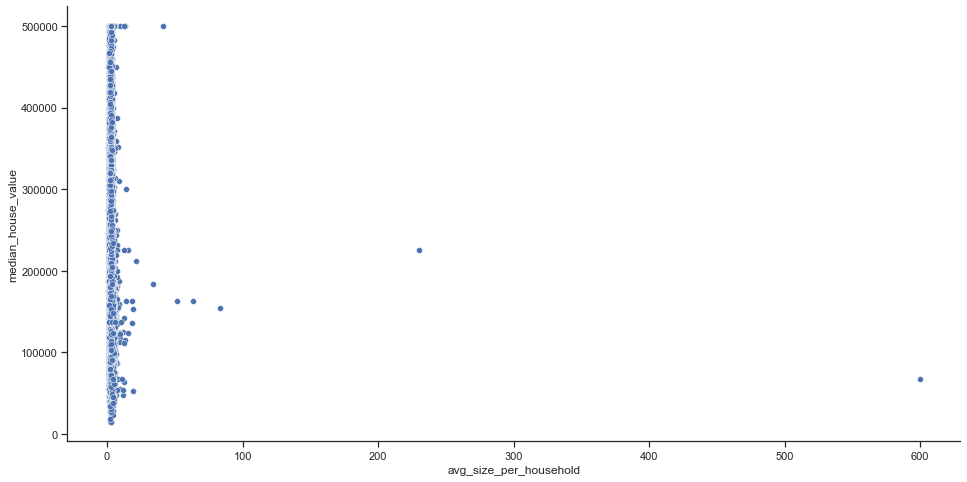

In [35]:
sns.scatterplot(data=train_dataset, x='avg_size_per_household', y='median_house_value')

I can not see any influence from this variable

Moreover: Some median_house_values are at 500.000 no matter of what each variable says... Are these data errors? For sure this has a big impact on the model and the results of the model. No matter what each variable says, it seems like some avalues are randomly at 500.000

## Correlation analysis

In [36]:
# Create correlation matrix for numerical variables
# Zusammenhang zwischen 2 Variablen, korrelationskoeffizient bewegt sich zwischen -1 und +1
corr_matrix = train_dataset.corr()
corr_matrix

median_housing_age  population  households  \
median_housing_age                    1.000000   -0.290676   -0.298956   
population                           -0.290676    1.000000    0.905457   
households                           -0.298956    0.905457    1.000000   
median_income                        -0.118533    0.001413    0.009405   
avg_rooms_per_household              -0.159107   -0.073562   -0.083166   
avg_bedrooms_per_household           -0.085167   -0.069351   -0.056585   
avg_size_per_household                0.007187    0.063843   -0.037716   
median_house_value                    0.109687   -0.026602    0.062131   

                            median_income  avg_rooms_per_household  \
median_housing_age              -0.118533                -0.159107   
population                       0.001413                -0.073562   
households                       0.009405                -0.083166   
median_income                    1.000000                 0.341320   
avg_rooms_per_household          0.341320                 1.000000   
avg_bedrooms_per_household      -0.072319                 0.832519   
avg_size_per_household           0.000913                -0.004603   
median_house_value               0.689398                 0.163913   

                            avg_bedrooms_per_household  \
median_housing_age                           -0.085167   
population                                   -0.069351   
households                                   -0.056585   
median_income                                -0.072319   
avg_rooms_per_household                       0.832519   
avg_bedrooms_per_household                    1.000000   
avg_size_per_household                       -0.007253   
median_house_value                           -0.046713   

                            avg_size_per_household  median_house_value  
median_housing_age                        0.007187            0.109687  
population                                0.063843           -0.026602  
households                               -0.037716            0.062131  
median_income                             0.000913            0.689398  
avg_rooms_per_household                  -0.004603            0.163913  
avg_bedrooms_per_household               -0.007253           -0.046713  
avg_size_per_household                    1.000000           -0.047674  
median_house_value                       -0.047674            1.000000

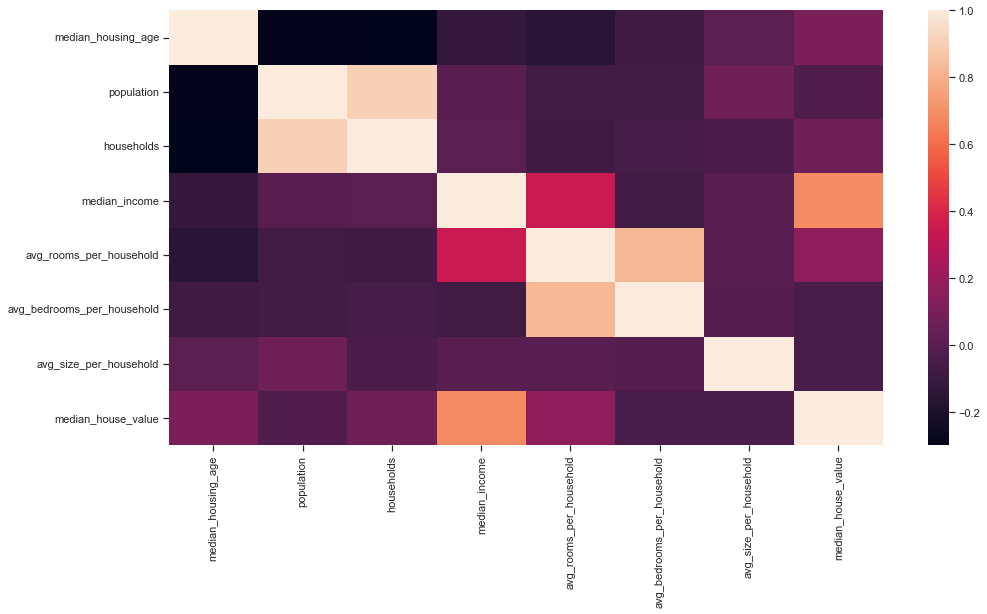

In [37]:
# Simple heatmap
heatmap = sns.heatmap(corr_matrix)

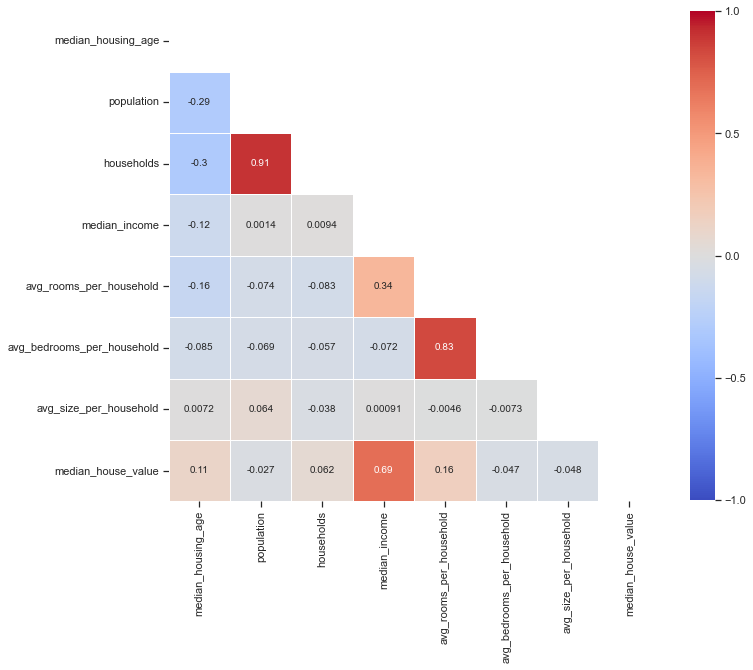

In [38]:
# Make a pretty heatmap

# Use a mask to plot only part of a matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= True

# Change size
plt.subplots(figsize=(11, 15))

# Build heatmap with additional options
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})

Mainly the median_income has an effect on the median_house_value,(as already seen with the plots). Moreover ocean_proximity is not included here, which also has an effect on the model

## VIF factor

In [39]:
from patsy import dmatrices

y, X =dmatrices('median_house_value ~ median_housing_age + population + households + median_income + avg_rooms_per_household + avg_bedrooms_per_household + avg_size_per_household + ocean_proximity', train_dataset, return_type='dataframe')

# For each X. calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

VIF Factor                        Feature
0        36.49                      Intercept
1         1.50      ocean_proximity[T.INLAND]
2         1.00      ocean_proximity[T.ISLAND]
3         1.19    ocean_proximity[T.NEAR BAY]
4         1.14  ocean_proximity[T.NEAR OCEAN]
5         1.30             median_housing_age
6         6.10                     population
7         6.19                     households
8         2.65                  median_income
9         8.17        avg_rooms_per_household
10        6.85     avg_bedrooms_per_household
11        1.06         avg_size_per_household

Interpretation from the VIF factor. Almost all variables have a very high VIF Factor (above 5). Therefore these should be excluded from the model.
The only variables left are:

- Ocean_proximity
- median_housing_age
- median_income
- avg_size_per_household

Process with various models will be skipped here, It was already made at the regression notebook

Even thought it was seen on the plots, that only Ocean_proximity and median_income have a big influence on the housing price, I will continue here with those 4 variables (in the regression notebook I made the models with only median_income and ocean_proximity and many more)

## Feature engineering

This step was already made at the start of the notebook. After understanding the data I made more logicall variables and changed the unit from median_income. That is why here is no further feature engineering.

## Model

The model will contain the 4 variables which were identified in the data analysis (various models were meda in the regression notebook, those will be skipped here).

In [40]:
# Select features for multiple regression
features= [
 'ocean_proximity',
 'median_housing_age',
 'median_income',
 'avg_size_per_household',
  ]

X = train_dataset[features]

# Create response
y = df["median_house_value"]

Now the pipieline which was created above can be used for the model

In [41]:
from sklearn.linear_model import LinearRegression

# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])



In [42]:
from sklearn import set_config

# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B35F6A2190>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B35F6A20D0>)])),
                ('lm', LinearRegression())])

### Evaluation with training data

In [43]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([ 15491.63082331, -42183.98910035,  47965.14586243,  81103.60527904,
       -17482.41514865,  20452.74397688,   -390.56043237, -23583.13922723,
       -89395.24916805, 143315.03434943, -19141.35295283, -11195.29300133])

In [44]:
y_pred_train = lm_pipe.predict(X_train)

In [45]:
from sklearn.metrics import r2_score

print('R2 score of the model is:', r2_score(y_train, y_pred_train))



R2 score of the model is: 0.6373239539446608


R2 score is okay, could be better but could also be worde

In [46]:
from sklearn.metrics import mean_squared_error
print('MSE of the model is :', mean_squared_error(y_train, y_pred_train))

print('RMSE of the model is:', mean_squared_error(y_train, y_pred_train, squared=False))

MSE of the model is : 4847734835.344568
RMSE of the model is: 69625.6765521497


RMSE is okay, but could be better

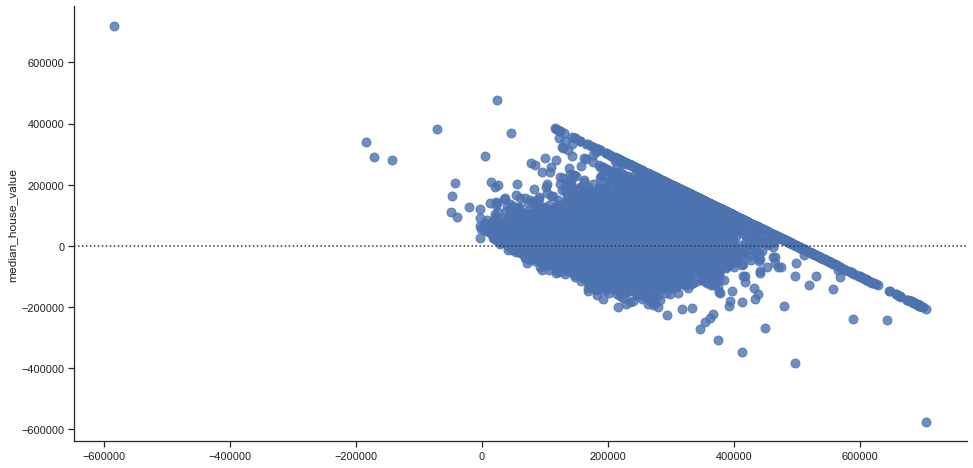

In [47]:
sns.residplot(x=y_pred_train, y=y_train, scatter_kws={"s": 80});

A lot of data is represented here, but it looks like that the distribution is equal on both sides of the zero line (which represents a correct prediction). But there are a lot of predictions which are far away.

### Evaluation with test data

In [48]:
# make predictions for test data
y_pred_test = lm_pipe.predict(X_test)

In [49]:
print('Mean squared error of the model is:', mean_squared_error(y_test, y_pred_test))

print('RMSE of the model is:', mean_squared_error(y_test, y_pred_test, squared=False))

print("R2-Score of the model is:", r2_score(y_test, y_pred_test) )

Mean squared error of the model is: 4967671710.857515
RMSE of the model is: 70481.71188937961
R2-Score of the model is: 0.6223872585046817


The valus from the trainings and test data set are similar, therefore the model works well on both data sets and is not overfitted. In the regression notebook I have made models with besser RMSE and R2 scores, but in this notebook I want to keep everything clean. Therefore I wont create further ones

## Conclusion

Sadly this model does not fulfill the requirements which were defined for the metrics. The RMSE is over 70.000 and the goal was to be less than 30.000. Therefore futher analysis and evaluation is necessary in the upcoming project, mabye there it is possible to bring this project to end successfully.

# Lasso regression
### Create dummy variables

The categorical variable needs to be exchanged to Dummy variables so that the Lasso_algorithmus from scikit learn can be used

In [50]:
# change the column Ocean Proximity to dummy variables
dummies = pd.get_dummies(df[['ocean_proximity']])

In [51]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ocean_proximity_<1H OCEAN   20433 non-null  uint8
 1   ocean_proximity_INLAND      20433 non-null  uint8
 2   ocean_proximity_ISLAND      20433 non-null  uint8
 3   ocean_proximity_NEAR BAY    20433 non-null  uint8
 4   ocean_proximity_NEAR OCEAN  20433 non-null  uint8
dtypes: uint8(5)
memory usage: 775.4 KB


In [52]:
print(dummies.head)

<bound method NDFrame.head of        ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                           0                         1   
1                           0                         1   
2                           0                         1   
3            

## Model

all variables will be added to this model, because Lasso will add information to the model (within the L1-regularization). This avoids overfitting of the model. Lasso will select the variables on his own

In [53]:
# drop median house value (as it is will be included in y and drop ocean_proximity as it will be added via the dummy variables). 
X_numerical = df.drop(['median_house_value', 'ocean_proximity'], axis=1).astype('float64')

In [54]:
list_numerical = X_numerical.columns
list_numerical

Index(['median_housing_age', 'population', 'households', 'median_income',
       'avg_rooms_per_household', 'avg_bedrooms_per_household',
       'avg_size_per_household'],
      dtype='object')

In [55]:
# create label
y = df['median_house_value']

#create feature --> all columns except the median_house_value and ocean proximity, plus add the dummy variables
X = pd.concat([X_numerical, dummies[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]], axis=1)



In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   median_housing_age          20433 non-null  float64
 1   population                  20433 non-null  float64
 2   households                  20433 non-null  float64
 3   median_income               20433 non-null  float64
 4   avg_rooms_per_household     20433 non-null  float64
 5   avg_bedrooms_per_household  20433 non-null  float64
 6   avg_size_per_household      20433 non-null  float64
 7   ocean_proximity_<1H OCEAN   20433 non-null  uint8  
 8   ocean_proximity_INLAND      20433 non-null  uint8  
 9   ocean_proximity_ISLAND      20433 non-null  uint8  
 10  ocean_proximity_NEAR BAY    20433 non-null  uint8  
 11  ocean_proximity_NEAR OCEAN  20433 non-null  uint8  
dtypes: float64(7), uint8(5)
memory usage: 1.8 MB


## Data split

In [57]:
from sklearn.model_selection import train_test_split
# Train Test Split
# Use random_state=10 to make this notebook's output identical at every run, test size shall be 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [58]:
X_train.head()

median_housing_age  population  households  median_income  \
4353                 39.0       975.0       525.0        93092.0   
6847                 42.0       656.0       215.0        41902.0   
18321                37.0       510.0       206.0        79029.0   
10987                23.0      1574.0       642.0        50210.0   
3115                 14.0       850.0       317.0        25812.0   

       avg_rooms_per_household  avg_bedrooms_per_household  \
4353                      7.23                        1.12   
6847                      4.82                        0.93   
18321                     6.25                        0.96   
10987                     5.45                        0.99   
3115                      5.49                        1.23   

       avg_size_per_household  ocean_proximity_<1H OCEAN  \
4353                     1.86                          1   
6847                     3.05                          1   
18321                    2.48                          0   
10987                    2.45                          1   
3115                     2.68                          0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
4353                        0                       0   
6847                        0                       0   
18321                       0                       0   
10987                       0                       0   
3115                        1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
4353                          0                           0  
6847                          0                           0  
18321                         1                           0  
10987                         0                           0  
3115                          0                           0

## Standardization
To avoid data leakage, the standardization of numerical features should always be performed after data splitting and only from training data. Furthermore, we obtain all necessary statistics for our features (mean and standard deviation) from training data and also use them on test data. Note that we don’t standardize our dummy variables (which only have values of 0 or 1).

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train = scaler.transform(X_train[list_numerical])
X_test = scaler.transform(X_test[list_numerical])

In [60]:
X_train

array([[ 0.82474126, -0.39325526,  0.06422021, ...,  0.75985608,
         0.05604997, -0.22040991],
       [ 1.06315283, -0.67235252, -0.74046338, ..., -0.25512274,
        -0.38961471,  0.0102119 ],
       [ 0.66580022, -0.80008982, -0.76382516, ...,  0.3471261 ,
        -0.31924661, -0.10025401],
       ...,
       [ 0.58632969,  0.14394134, -0.29399378, ..., -0.30144957,
        -0.08468625,  0.21563972],
       [ 1.46050545, -0.28651587, -0.58731393, ..., -0.65942965,
        -0.03777418,  0.19432174],
       [ 0.18897707,  0.41428946, -0.06556747, ..., -0.00243092,
        -0.22542246,  0.19432174]])

## Lasso Regression

### Testing with random selected alpha of 1

In [61]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

### Model evaluation

In [62]:
print('R squared training set is:', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set is:', round(reg.score(X_test, y_test)*100, 2))

R squared training set is: 57.7
R squared test set is: 55.02


In [63]:
#Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set is:', round(mse_train,2))

# Test data
pred =reg.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print('MSE test set is:', round(mse_test,2))

MSE training set is: 5653970114.35
MSE test set is: 5917926334.37


Values are similar for the training and test set.
R2 score/MSE is not that good. On my regression notebook I made the same model (but removed data with leverage/outliners) and the R2 and MSE score is much better.

### Lasso with optimal alpha (k-fold cross validation)

Show best value of penalization chosen by cross validation:

In [64]:
from sklearn.linear_model import LassoCV


# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model

model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [65]:
print('The optimal alpha values is:', model.alpha_)

The optimal alpha values is: 211.7007825838578


### Best model

In [66]:
# set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=211.7007825838578)

In [67]:
print(list(zip(lasso_best.coef_, X)))

[(23569.95952566849, 'median_housing_age'), (-39641.97936817804, 'population'), (47659.13372222038, 'households'), (98607.10465213949, 'median_income'), (-41001.61026880808, 'avg_rooms_per_household'), (37599.981912588526, 'avg_bedrooms_per_household'), (-1147.1570506843073, 'avg_size_per_household')]


### Model evaluation

In [68]:
print('R squared training set is:', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set is:', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set is: 57.68
R squared test set is: 55.17


Similar values for the random alpha and best alpa. That means something with my model has to be wrong, but I do not know what and how to improve it :/
Moreover similar values for the trainings and test set, which is good

In [69]:
print('MSE of the training set is:', mean_squared_error(y_train, lasso_best.predict(X_train)))
print('MSE of the test set is:', mean_squared_error(y_test, lasso_best.predict(X_test)))

MSE of the training set is: 5656321815.3197365
MSE of the test set is: 5897249603.173252


Similar values for the random alpha and best alpa. That means something with my model has to be wrong, but I do not know what and how to improve it :/
Moreover similar values for the trainings and test set, which is good

Lasso path: plot results of cross-validation with mean squared erros

(56.42610065198788, 112584.87221155253, 5028894722.265119, 14286817273.330883)

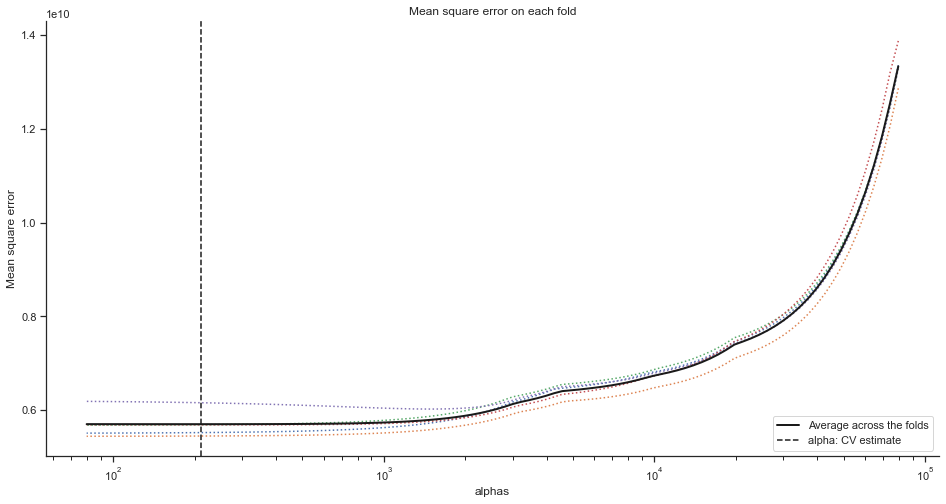

In [70]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

# ymin, ymax = 3800000000, 4500000000
# plt.ylim(ymin, ymax);

# Splines
### Create label and feature

Due to the fact that the median_income has the biggest effect on the median_house_value (see correlation analysis) and the model with only median_income has the highest F-Statistic, I will only use this feature to predict the median_house_value (see regression notebook)

Beside the Natural Spline Regression I will also do the Ridge Regression, the Polynomial regression as well as the splines in patsy and scikit learn

In [71]:
X = df[['median_income']]
y = df[['median_house_value']]

### Data split
Dividing data intro train and test datasets

In [72]:
# Train Test Split
# Use random_state=10 to make this notebook's output identical at every run, test size shall be 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Data exploration

Visualize the relationship between median_income and median_house_value

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

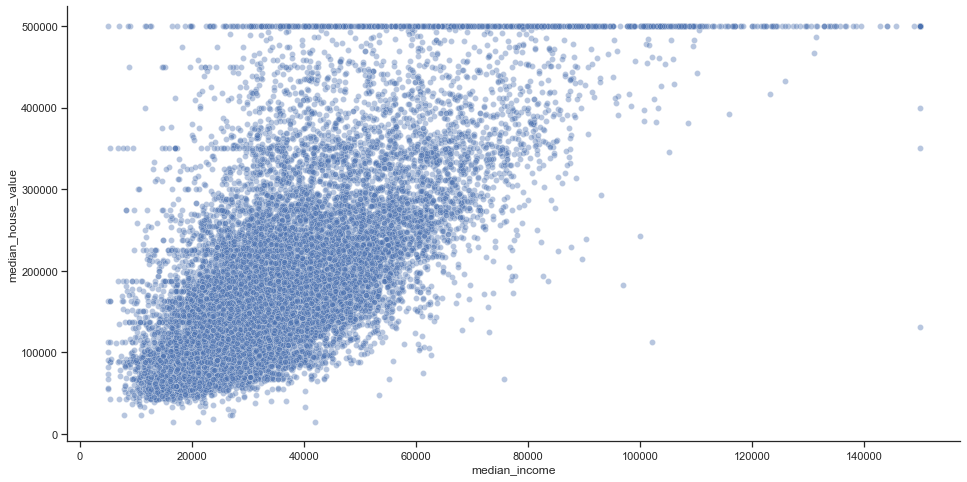

In [73]:
# seaborn settings
costum_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=costum_params)

#plot
sns.scatterplot(x=X_train['median_income'], y=y_train['median_house_value'], alpha=0.4)

## Ridge Regression

In [74]:
from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)

Ridge()

In [75]:
print(reg.coef_)
print(reg.intercept_)

[[4.19531363]]
[44417.34896073]


In [76]:
from sklearn.metrics import mean_squared_error

# create function to obtain model mse
def model_results(model_name):

    # Training data
    pred_train = reg.predict(X_train)
    rmse_train = round(mean_squared_error(y_train, pred_train, squared=False),4)

    # Test data
    pred_test = reg.predict(X_test)
    rmse_test = round(mean_squared_error(y_test, pred_test, squared=False),4)

    # Print model results
    result = pd.DataFrame(
        {"model": model_name,
        "rmse_train": [rmse_train],
        "rmse_test": [rmse_test]}
    )

    return result

In [77]:
model_results(model_name="ridge")

model  rmse_train   rmse_test
0  ridge  83748.7008  83666.3047

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

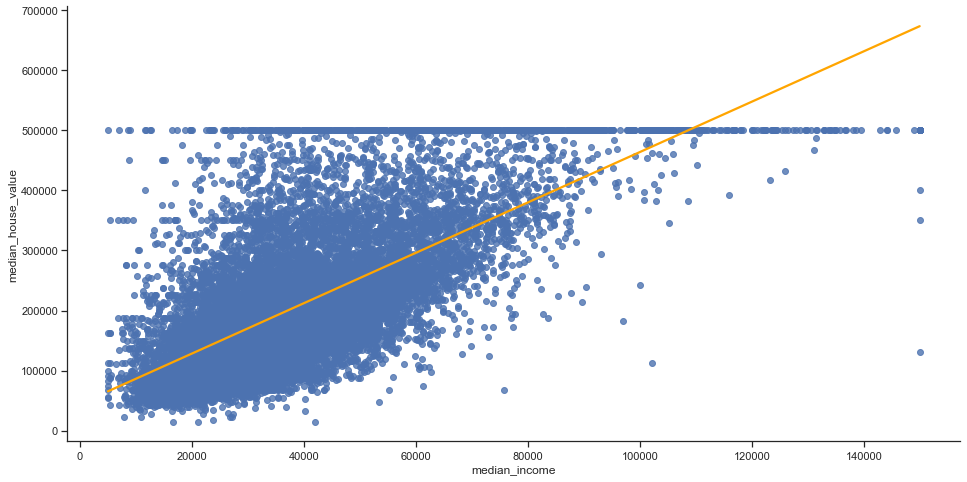

In [78]:
sns.regplot(x=X_train['median_income'],
            y=y_train['median_house_value'],
            ci=None,
            line_kws={"color": "orange"})

## Polynomial regression
This will be used to add non linear features to the Ridge-Regression model

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# use polynomial features with degree 1
reg = make_pipeline(PolynomialFeatures(degree=2),
                        Ridge())

reg.fit(X_train, y_train)

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.27216e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [80]:
model_results(model_name="poly")

model  rmse_train   rmse_test
0  poly  83394.8636  83276.7644

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

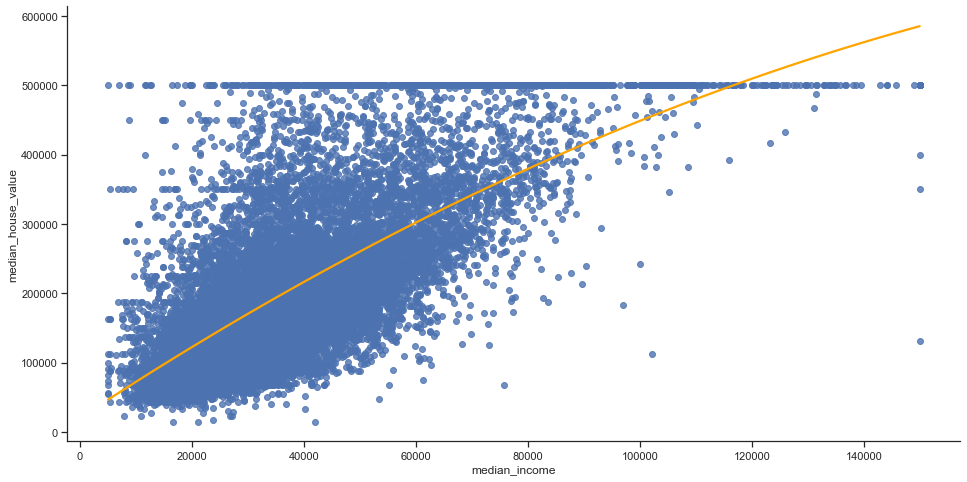

In [81]:
# plot 
sns.regplot(x=X_train['median_income'],
                y=y_train['median_house_value'],
                ci=None,
                order=2,
                line_kws={"color": "orange"})

## Splines
### Splines in Scikit learn

In [82]:
from sklearn.preprocessing import SplineTransformer

# use a spline wit 4 knots and 2 degree with a ridge regressions
reg = make_pipeline(SplineTransformer(n_knots=4, degree=2), 
                       Ridge(alpha=1))
                     
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

In [83]:
model_results(model_name = "spline")

model  rmse_train   rmse_test
0  spline  82753.2654  82716.3706

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(


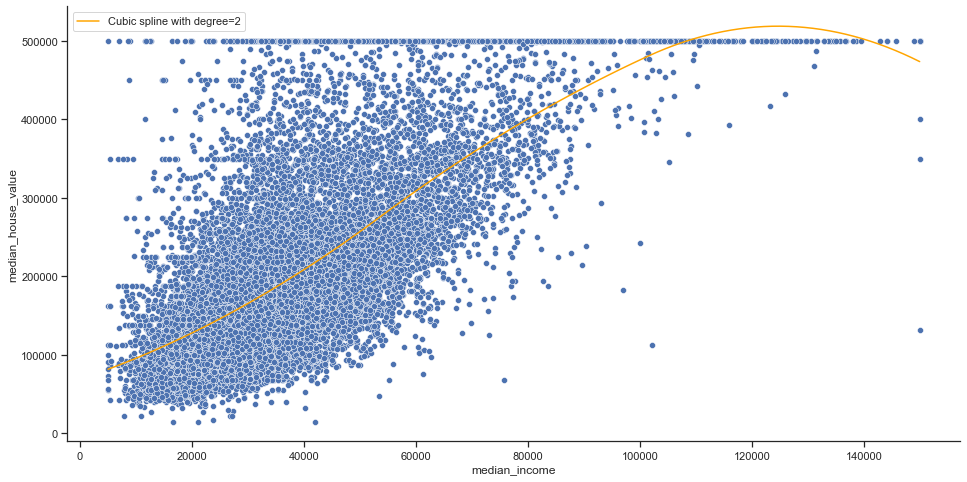

In [84]:
# Create observations
x_new = np.linspace(X_test.min(), X_test.max(),100)
#Make some oredictions
pred= reg.predict(x_new)

#plot
sns.scatterplot(x=X_train['median_income'], y=y_train['median_house_value'])

plt.plot(x_new, pred, label='Cubic spline with degree=2', color='orange')
plt.legend()

### Splines in patsy
In the next step I use the module patsy to create non-linear tranformations of the input data.
Moreover statsmodels is used to fit 2 models with different number of knots

In [85]:
from patsy import dmatrix
# Generating cubic spines with 3 knots at 25000, 40000 and 60000
transformed_x = dmatrix(
    "bs(train, knots=(25000,40000,80000), degree=3, include_intercept=False)",
    {"train": X_train}, return_type='dataframe'
)

Statsmodels is used for estimating a generalized linear model:

In [86]:
# Fitting gneralised linear model on transformed dataset
reg = sm.GLM(y_train, transformed_x).fit()

In [87]:
#Training data
pred_train = reg.predict(dmatrix("bs(train, knots=(25000,40000,80000), include_intercept=False)", {"train": X_train}, return_type='dataframe'))
rmse_train = mean_squared_error(y_train, pred_train, squared=False)

# Test data
pred_test = reg.predict(dmatrix("bs(test, knots=(25000,40000,80000), include_intercept=False)", {"test": X_test}, return_type='dataframe'))
rmse_test = mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results = pd.DataFrame(
    {
        "model": "Cubic spline (cs)",
        "rmse_train": [rmse_train],
        "rmse_test": [rmse_test]
    })

model_results

model    rmse_train     rmse_test
0  Cubic spline (cs)  82494.241264  82290.312289

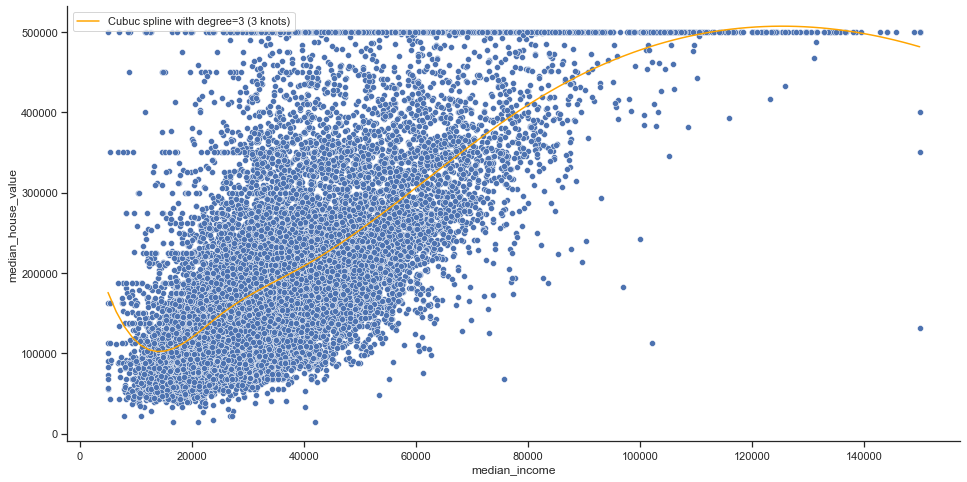

In [88]:
# Create observations
xp = np.linspace(X_test.min(),X_test.max(),100)
# Make some predictions
pred = reg.predict(dmatrix("bs(xp, knots=(25000,40000,80000), include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# plot
sns.scatterplot(x=X_train['median_income'], y=y_train['median_house_value'])

plt.plot(xp, pred, label='Cubuc spline with degree=3 (3 knots)', color='orange')
plt.legend()

### Natural spline
Now a natural spline will be fitted with patsy and stats models

In [89]:
transformed_x3 = dmatrix("cr(train, df=3)", {"train": X_train}, return_type='dataframe')

reg = sm.GLM(y_train, transformed_x3).fit()

In [90]:
# Training data
pred_train = reg.predict(dmatrix("cr(train, df=3)", {"train": X_train}, return_type='dataframe'))
rmse_train = mean_squared_error(y_train, pred_train, squared=False)

#Test data
pred_test = reg.predict(dmatrix("cr(test, df=3)", {"test": X_test}, return_type='dataframe'))
rmse_test = mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_ns = pd.DataFrame(
    {"model": "natural splines (ns)",
    "rmse_train": [rmse_train],
    "rmse_test": [rmse_test]})

model_results_ns

model    rmse_train     rmse_test
0  natural splines (ns)  83502.321848  83410.133651

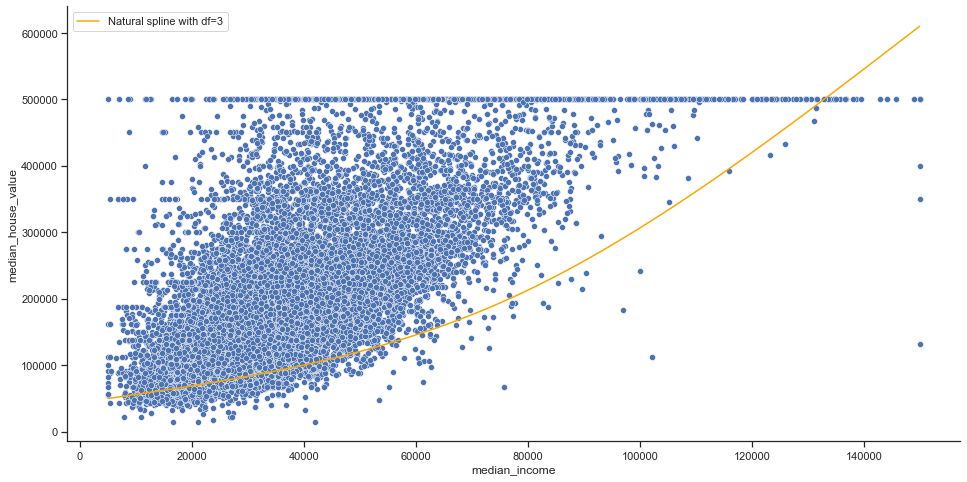

In [91]:
# Make predictions
pred = reg.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

#plot
sns.scatterplot(x=X_train['median_income'], y=y_train['median_house_value'])
plt.plot(xp, pred, color='orange', label='Natural spline with df=3')
plt.legend()

Sadly the spline is missing most of the data points. I tried to do the analysis and code with degree=1 or 2 but in both cases I only received errors. After trying for several hours, I give up on fixing this.